In [62]:
import torch
import torch.nn as nn
import torch.nn.functional as F  # Import the functional API
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [71]:
# Transformations for the input data
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_path = '/Users/markusbaumann/Documents/CS/computervision/Project/emotions/train'  
test_path = '/Users/markusbaumann/Documents/CS/computervision/Project/emotions/test'   


train_dataset = datasets.ImageFolder(train_path, transform=transform)
test_dataset = datasets.ImageFolder(test_path, transform=transform)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)



In [72]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 12 * 12, 1000)  
        self.fc2 = nn.Linear(1000, 7)  

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

    def num_flat_features(self, x):
        size = x.size()[1:]  
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


model = SimpleCNN()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()


In [73]:
num_epochs = 3 
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 50 == 0:
            print(f'Epoch: {epoch}, Batch: {batch_idx}, Loss: {loss.item()}')


Epoch: 0, Batch: 0, Loss: 1.9402275085449219
Epoch: 0, Batch: 50, Loss: 1.7261465787887573
Epoch: 0, Batch: 100, Loss: 1.7384361028671265
Epoch: 0, Batch: 150, Loss: 1.6691871881484985
Epoch: 0, Batch: 200, Loss: 1.5977551937103271
Epoch: 0, Batch: 250, Loss: 1.5958003997802734
Epoch: 0, Batch: 300, Loss: 1.8103358745574951
Epoch: 0, Batch: 350, Loss: 1.6242913007736206
Epoch: 0, Batch: 400, Loss: 1.5457048416137695
Epoch: 1, Batch: 0, Loss: 1.33516263961792
Epoch: 1, Batch: 50, Loss: 1.5083991289138794
Epoch: 1, Batch: 100, Loss: 1.5762546062469482
Epoch: 1, Batch: 150, Loss: 1.5428920984268188
Epoch: 1, Batch: 200, Loss: 1.3790987730026245
Epoch: 1, Batch: 250, Loss: 1.4712404012680054
Epoch: 1, Batch: 300, Loss: 1.4438554048538208
Epoch: 1, Batch: 350, Loss: 1.7080713510513306
Epoch: 1, Batch: 400, Loss: 1.4800176620483398
Epoch: 2, Batch: 0, Loss: 1.3202717304229736
Epoch: 2, Batch: 50, Loss: 1.4892897605895996
Epoch: 2, Batch: 100, Loss: 1.2687618732452393
Epoch: 2, Batch: 150, Lo

In [74]:
model.eval()  
correct = 0
total = 0

with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy:.2f}%')

Accuracy on the test set: 49.86%


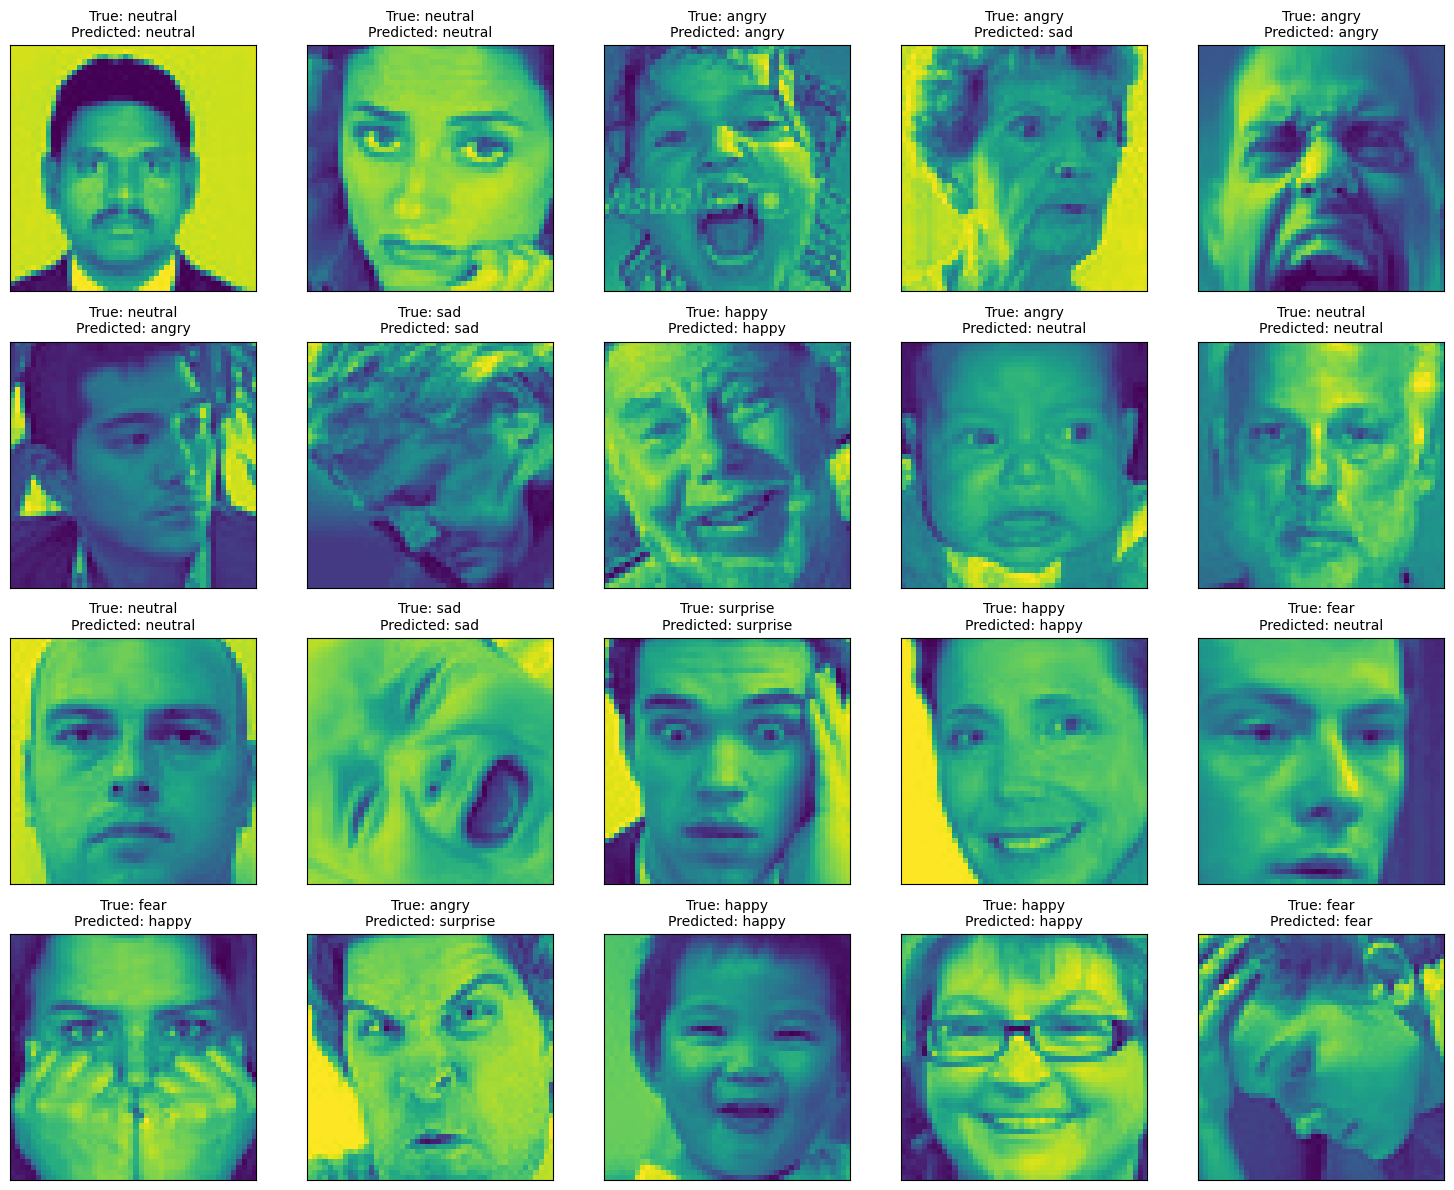

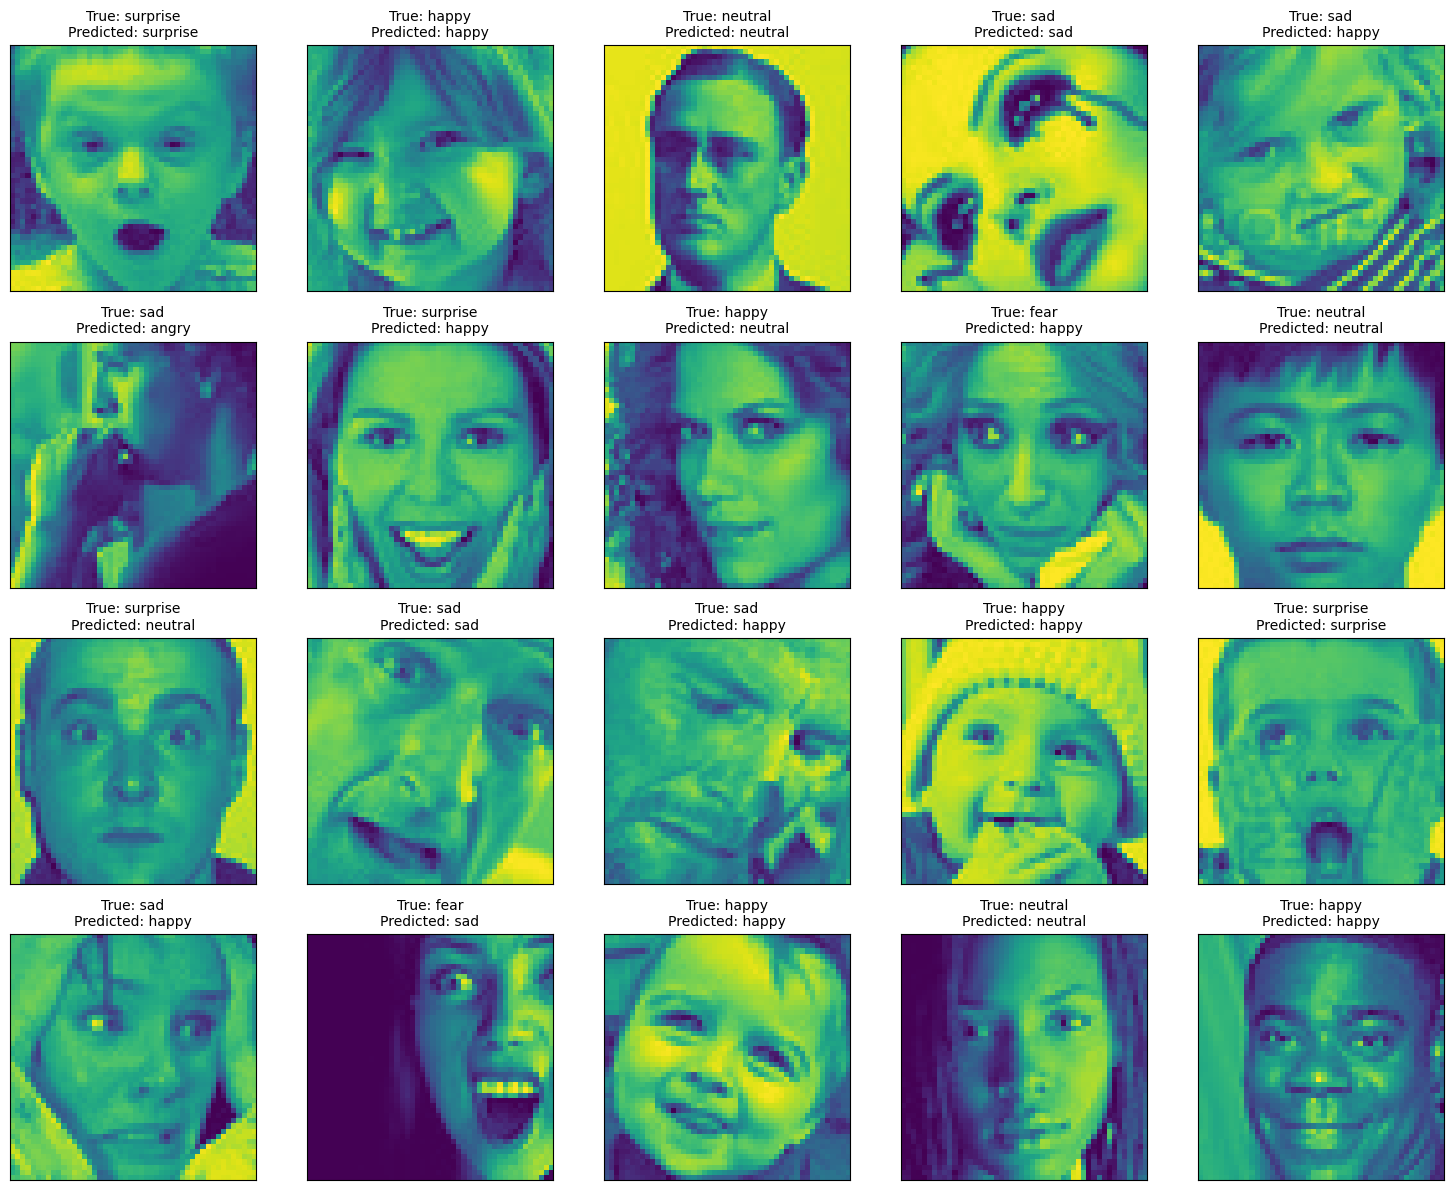

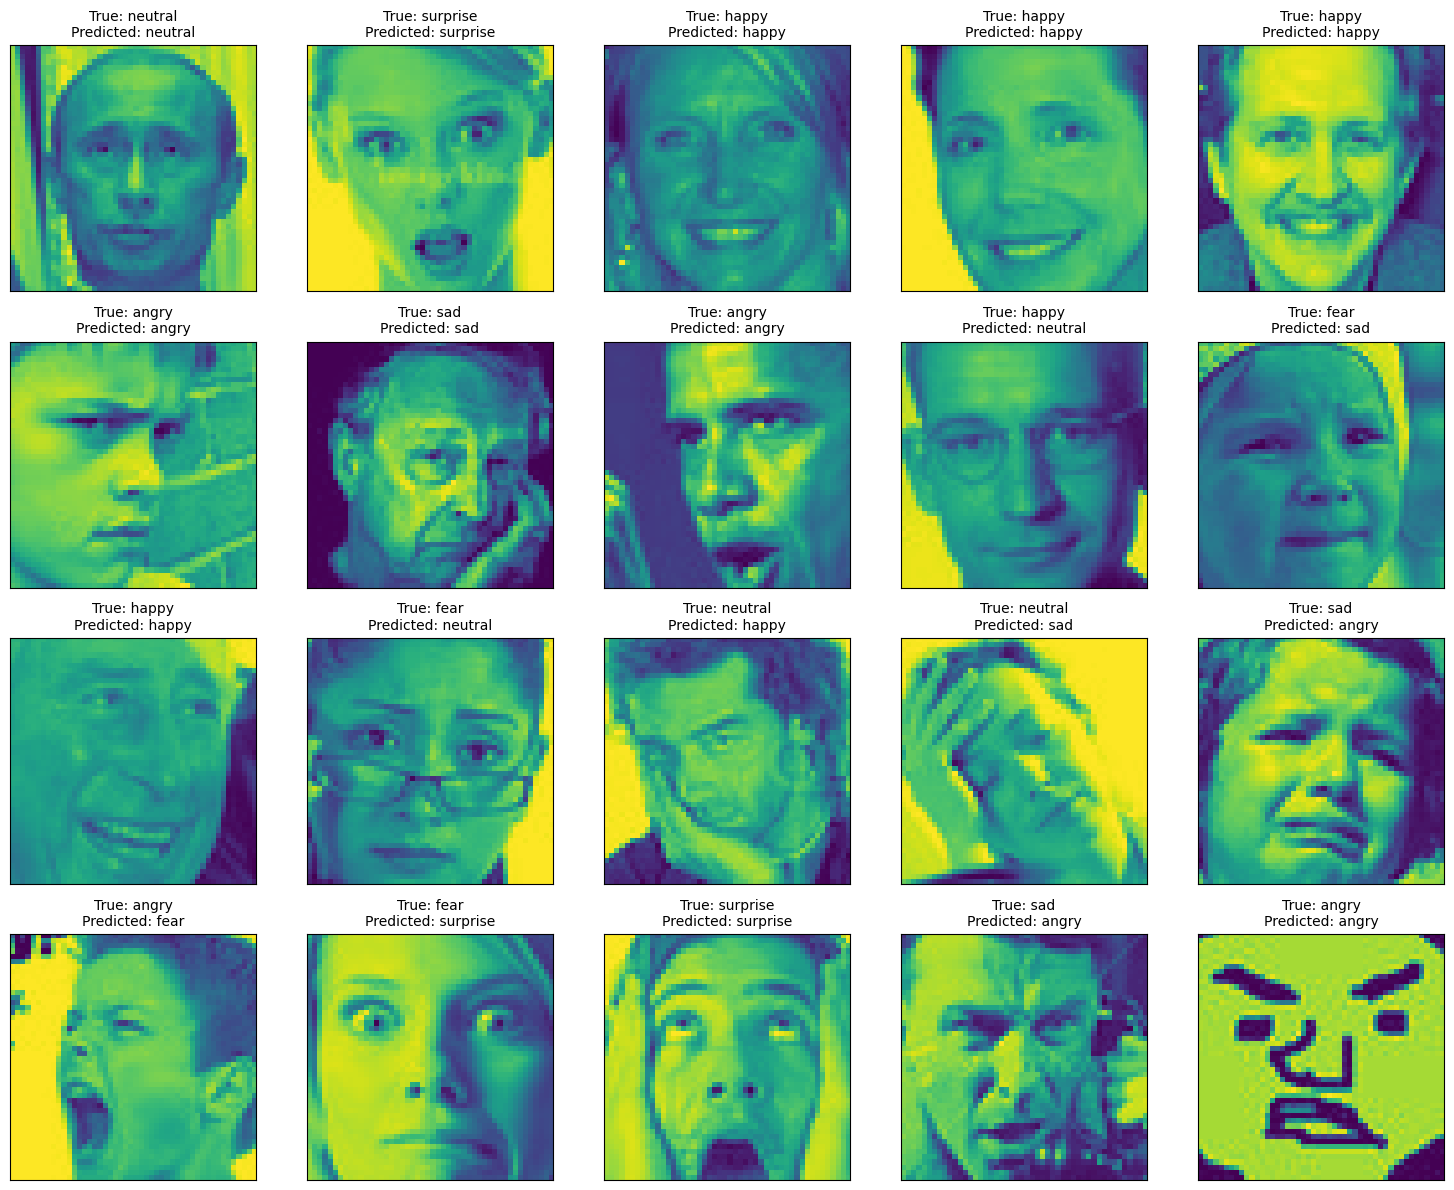

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def imshow(img):
    img = img / 2 + 0.5  
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


for i in range(3): 
    dataiter = iter(test_loader)
    images, labels = next(dataiter)

    num_images = 20

    model.eval()
    outputs = model(images[:num_images])
    _, predicted = torch.max(outputs, 1)

    class_names = train_dataset.classes


    rows = 4
    cols = 5
    fig = plt.figure(figsize=(15, 12))

    for idx in range(num_images):
        ax = fig.add_subplot(rows, cols, idx + 1, xticks=[], yticks=[])
        imshow(images[idx])
        ax.set_title(f"True: {class_names[labels[idx]]}\nPredicted: {class_names[predicted[idx]]}", fontsize=10)

    plt.tight_layout()
    plt.show()



